## Q4. SVM and KNN 

Given a dataset SocialNetworkAds.csv (can be downloaded from https://github.com/mk-gurucharan/Classification/blob/master/SocialNetworkAds.csv), build a classifier using both SVM and KNN.

1. Evaluate your classifier performance using recall, precision and F-measure.
2. Visualize your classification results.
3. Compare with SVM and KNN classifiers.

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the dataset

In [2]:
Ads = pd.read_csv('SocialNetworkAds.csv')

### Exploring the dataset

This dataset contains 400 entries with three variables: "Age", "EstimatedSalary", and "Purchased". 

In [3]:
Ads.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
Ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [5]:
Ads.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [6]:
Ads.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### Creating X array and y array

In [7]:
X = Ads.iloc[:, [0,1]].values
y = Ads.iloc[:, 2].values

### Splitting the dataset into the training set and test set

The dataset is split into 75/25 ratio (training set = 0.75 & test set = 0.25). We set the parameter random_state=0 to control the shuffling applied to the data before applying the split for the reproducible purpose.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 1. K-nearest neighbors (K-NN)

#### - Determining k using the elbow method

Text(0, 0.5, 'Error Rate')

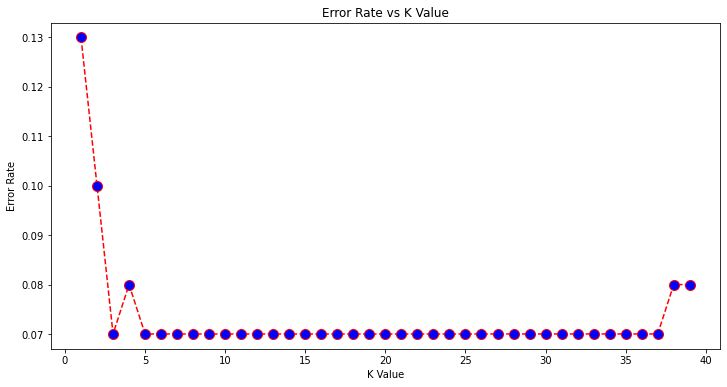

In [10]:
from sklearn.neighbors import KNeighborsClassifier

error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')


We can see the error rates remain the same when choosing k from 5 to 37. So we will choose k=5 when training the K-NN on the dataset.

#### - Fitting the K-NN classifier to the training set

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

#### - Predicting the test set results

In [12]:
y_pred = knn.predict(X_test)

#### - Evaluating the K-NN classifier performance

precision=0.88, recall=0.91, F-measure=0.89, accuracy=0.93

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# confusion matrix
print("confusion matrix:\n", confusion_matrix(y_test, y_pred))

confusion matrix:
 [[64  4]
 [ 3 29]]


In [14]:
# classification report
print("classification report:\n", classification_report(y_test, y_pred))

classification report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [15]:
# accuracy score
print("accuracy: ", accuracy_score(y_test, y_pred))

accuracy:  0.93


#### - Visualizing the training set results

The data visualization of the training set and test set is shown below. 

The green dots shows people purchased whereas red dots shows people did not purchase. The green dots on the green region shows the true positive whereas the red dots on the red region shows the true negative. The wrongly classified are the green dots in the red region (false negative) and the red dots in the green region (false positive).

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


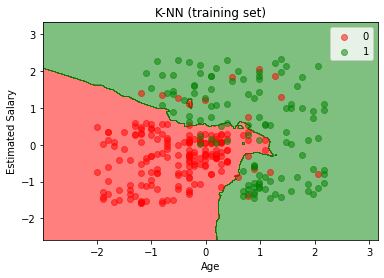

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], alpha=0.5,
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


#### - Visualizing the test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


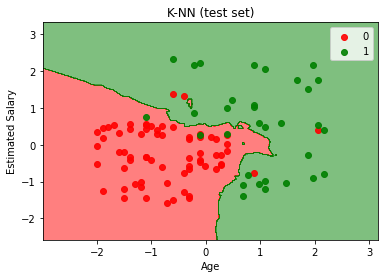

In [17]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], alpha=0.9,
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


### 2. Support-vector machine (SVM)

#### (a) SVM (linear kernel)

#### - Fitting the SVM (linear kernel) to the training set

In [18]:
from sklearn.svm import SVC
svm_linear = SVC(kernel = 'linear', random_state= 0)
svm_linear.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

#### - Predicting the test set results

In [19]:
y_pred = svm_linear.predict(X_test)

#### - Evaluating the SVM (linear kernel) performance

precision=0.92, recall=0.75, F-measure=0.83, accuracy=0.9

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# confusion matrix
print("confusion matrix:\n", confusion_matrix(y_test, y_pred))

confusion matrix:
 [[66  2]
 [ 8 24]]


In [21]:
# classification report
print("classification report:\n", classification_report(y_test, y_pred))

classification report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



In [22]:
# accuracy score
print("accuracy: ", accuracy_score(y_test, y_pred))

accuracy:  0.9


#### - Visualizing the training set results

The data visualization of the training set and test set is shown below. 

The green dots shows people purchased whereas red dots shows people did not purchase. The green dots on the green region shows the true positive whereas the red dots on the red region shows the true negative. The wrongly classified are the green dots in the red region (false negative) and the red dots in the green region (false positive).

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


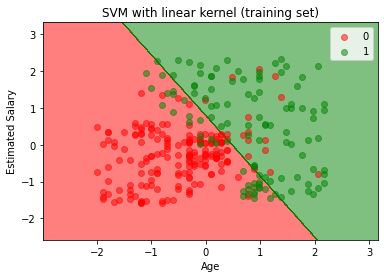

In [23]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm_linear.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], alpha=0.5,
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM with linear kernel (training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


#### - Visualizing the test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


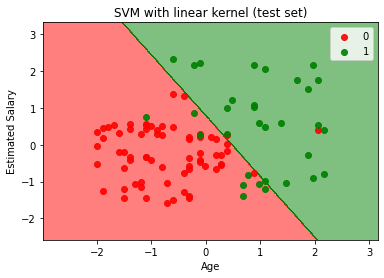

In [24]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm_linear.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], alpha=0.9,
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM with linear kernel (test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


#### (b) SVM (rbf kernel)

#### - Fitting the SVM (rbf kernel) to the training set

In [25]:
from sklearn.svm import SVC
svm_rbf = SVC(kernel = 'rbf', random_state= 0)
svm_rbf.fit(X_train, y_train)

SVC(random_state=0)

#### - Predicting the test set results

In [26]:
y_pred = svm_rbf.predict(X_test)

#### - Evaluating the SVM (rbf kernel) performance

precision=0.88, recall=0.91, F-measure=0.89, accuracy=0.93

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# confusion matrix
print("confusion matrix:\n", confusion_matrix(y_test, y_pred))

confusion matrix:
 [[64  4]
 [ 3 29]]


In [28]:
# classification report
print("classification report:\n", classification_report(y_test, y_pred))

classification report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [29]:
# accuracy score
print("accuracy: ", accuracy_score(y_test, y_pred))

accuracy:  0.93


#### - Visualizing the training set results

The data visualization of the training set and test set is shown below. 

The green dots shows people purchased whereas red dots shows people did not purchase. The green dots on the green region shows the true positive whereas the red dots on the red region shows the true negative. The wrongly classified are the green dots in the red region (false negative) and the red dots in the green region (false positive).

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


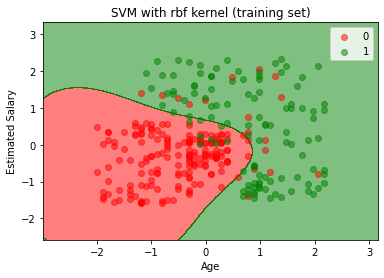

In [30]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm_rbf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], alpha=0.5,
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM with rbf kernel (training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


#### - Visualizing the test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


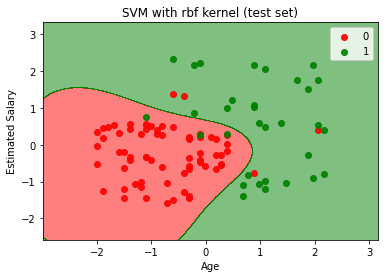

In [31]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm_rbf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], alpha=0.9,
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM with rbf kernel (test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### 3. K-NN vs SVM

To summarize the above results, 
 - For K-NN, precision=0.88, recall=0.91, F-measure=0.89, accuracy=0.93
 - For SVM with linear kernel, precision=0.92, recall=0.75, F-measure=0.83, accuracy=0.9
 - For SVM with rbf kernel, precision=0.88, recall=0.91, F-measure=0.89, accuracy=0.93

Therefore, we conclude that, for this dataset, SVM with non-linear kernel outperforms SVM with linear kernel, whereas SVM with non-linear kernel and K-NN have similar performance.